In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
#T given k

k= 5
t= (k/2650.89)**.25
print(t)

0.20839849312723444


In [3]:
#k given t

t= .5
k= 2650.89*t**4
print(k)

165.680625


In [13]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                     # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+4)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT

In [14]:
def pepe(T):
    output= (7/8)*((np.pi**2)/30)*4*T**4
    return output

In [15]:
def weight(x, T):
    u= .510998/T
    g= ((np.sqrt(x**2+u**2)*x**2*np.exp(x))/(np.exp(np.sqrt(x**2+u**2))+1))
    return g

    
      
def g(w,x, T):
    summ= 0
    for i in range(40):
        summ= summ+ w[i]*weight(x[i], T)
    return summ


def VT_function(ym, Eval, T):
    u= .510998/T
    x, w= geek.laggauss(40)

    
    pepe= (4*T**4)/ (2*np.pi**2)* g(w,x, T)
    v= np.zeros(3)
    mw= 80433
    mz= 91187.6
    constant1= (16*np.sqrt(2)*Gf)/(3*mw**2)
    constant2= (8*np.sqrt(2)*Gf)/(3*mz**2)
    yx= Eval[:]**3*ym[:,0]*ym[:,1]
    yy= Eval[:]**3*ym[:,0]*ym[:,2]
    yz= Eval[:]**3*ym[:,0]*ym[:,3]
    x_integral= np.trapz(yx , Eval)
    y_integral= np.trapz(yy , Eval)
    z_integral= np.trapz(yz , Eval)
    v[0]= constant2*x_integral
    v[1]= constant2*y_integral
    v[2]= constant2*z_integral + constant1*pepe
    
    return -v

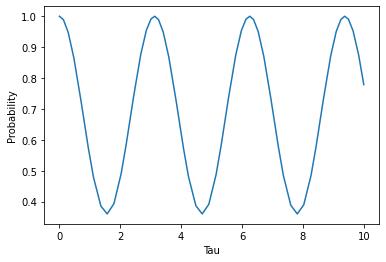

CPU times: user 19.4 s, sys: 161 ms, total: 19.5 s
Wall time: 19.4 s


In [16]:
%%time

t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100               
dN = 500
tau_final=10
t_final = tau_final*2*2.2/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

prob_ve= der.probability(ym0, Eval, t, y)
tau= (dm2/(2*2.2))*t

plt.figure()
plt.plot(tau, prob_ve)
plt.xlabel("Tau")
plt.ylabel("Probability")
plt.show()


